In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets.mnist import load_data

In [ ]:
(x_train,y_train),(x_test,y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


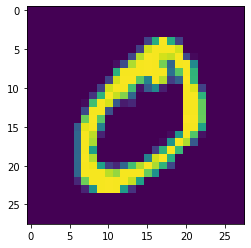

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_train[1]

0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
train_img = x_train.reshape(x_train.shape[0],28,28,1)

In [ ]:
train_img.shape

(60000, 28, 28, 1)

In [ ]:
train_img = train_img/255

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 100

train_dataset = tf.data.Dataset.from_tensor_slices(train_img).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

**DISCRIMINATOR**

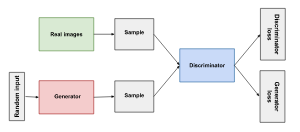

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,LeakyReLU

In [ ]:
def discriminator_model():
  model = Sequential()
  model.add(Conv2D(7,(3,3),padding='same',input_shape=(28,28,1)))
  model.add(Flatten())
  model.add(LeakyReLU())
  model.add(Dense(50,activation='relu'))
  model.add(Dense(1))
  return model


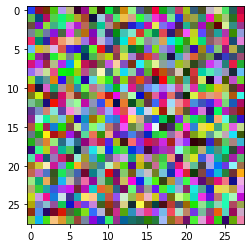

In [ ]:
a=np.random.rand(28,28,3)
plt.imshow(a)

In [ ]:
model_discriminator = discriminator_model()

In [ ]:
model_discriminator(np.random.rand(1,28,28,1).astype('float32'))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.69687974]], dtype=float32)>

In [ ]:
discriminator_optimizer = tf.optimizers.Adam(1e-3)

In [ ]:
def discriminator_loss(real_pred,fake_pred):
  real_pred = tf.sigmoid(real_pred)
  fake_pred = tf.sigmoid(fake_pred)
  real_loss = tf.losses.binary_crossentropy(tf.ones_like(real_pred),real_pred)
  fake_loss = tf.losses.binary_crossentropy(tf.zeros_like(fake_pred),fake_pred)
  return real_loss+fake_loss


**Generator**

In [ ]:
from keras.layers import BatchNormalization,Conv2DTranspose

In [ ]:
def generator_model():
  model = Sequential()
  model.add(Dense(7*7*256,input_shape=(100,)))
  model.add(BatchNormalization())
  model.add(tf.keras.layers.Reshape((7,7,256)))
  model.add(Conv2DTranspose(128,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2DTranspose(64,(3,3),padding='same',strides=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2DTranspose(1,(3,3),padding='same',strides=(2,2)))
  return model




In [ ]:
model_generator = generator_model()


In [ ]:
generator_optimizer = tf.optimizers.Adam(1e-4)

In [ ]:
def generator_loss(fake_pred):
    fake_pred = tf.sigmoid(fake_pred)
    fake_loss = tf.losses.binary_crossentropy(tf.ones_like(fake_pred),fake_pred)
    return fake_loss



**Training**

In [ ]:
def train(dataset,epochs):
  for i in range(epochs):
    for image in dataset:
      image = tf.cast(image,tf.dtypes.float32)
      train_step(image)


In [ ]:
def train_step(image):
  fake_image_noise = np.random.rand(100,100).astype('float32')
  with tf.GradientTape() as gen_grad,tf.GradientTape() as disc_grad:
    generated_image = model_generator(fake_image_noise)
    real_output = model_discriminator(image)
    fake_output = model_discriminator(generated_image)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output,fake_output)
 
    grad_of_gen = gen_grad.gradient(gen_loss,model_generator.trainable_variables)
    grad_of_disc = disc_grad.gradient(disc_loss,model_discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(grad_of_gen,model_generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(grad_of_disc,model_discriminator.trainable_variables))

    print("Genarator Loss ::",np.mean(gen_loss))
    print("Discriminator Loss ::",np.mean(disc_loss))

In [ ]:
train_img.shape

(60000, 28, 28, 1)

In [ ]:
train(train_dataset,2)

Genarator Loss :: 0.69852865
Discriminator Loss :: 1.6152275
Genarator Loss :: 0.6963333
Discriminator Loss :: 1.2005415
Genarator Loss :: 0.703643
Discriminator Loss :: 0.99014145
Genarator Loss :: 0.7096447
Discriminator Loss :: 0.88686836
Genarator Loss :: 0.70614034
Discriminator Loss :: 0.81667066
Genarator Loss :: 0.6833523
Discriminator Loss :: 0.81243515
Genarator Loss :: 0.6507121
Discriminator Loss :: 0.8141844
Genarator Loss :: 0.609767
Discriminator Loss :: 0.85348344
Genarator Loss :: 0.5596009
Discriminator Loss :: 0.8856179
Genarator Loss :: 0.51397276
Discriminator Loss :: 0.9502858
Genarator Loss :: 0.4722309
Discriminator Loss :: 1.0217896
Genarator Loss :: 0.44320953
Discriminator Loss :: 1.0706681
Genarator Loss :: 0.43945563
Discriminator Loss :: 1.0787643
Genarator Loss :: 0.45953503
Discriminator Loss :: 1.0410585
Genarator Loss :: 0.521742
Discriminator Loss :: 0.97338015
Genarator Loss :: 0.6368235
Discriminator Loss :: 0.8454087
Genarator Loss :: 0.81222665
Di

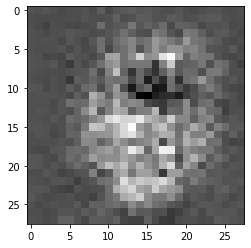

In [ ]:
plt.imshow(tf.reshape(model_generator(np.random.rand(1,100)),(28,28)),cmap="gray")